# **Rasoul Qashqaei - Iris Logistic Regression without skit learn**

Import Library

In [ ]:
import pandas as pd
# used to read the data set
import numpy as np
# used to do some operations with the arrays
import os
# used handle some files
import matplotlib.pyplot as plt
# used to visualize the data using graphs
import seaborn as sns
# plotting the chart in a single line
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py

load the dataset

In [ ]:
df = pd.read_csv("iris.csv")

display the first five rows of the data set

In [ ]:
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


have the information about the data type of the data set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.corr()

<ipython-input-146-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


**Visualization and Understanding**

<Axes: xlabel='variety', ylabel='sepal.width'>

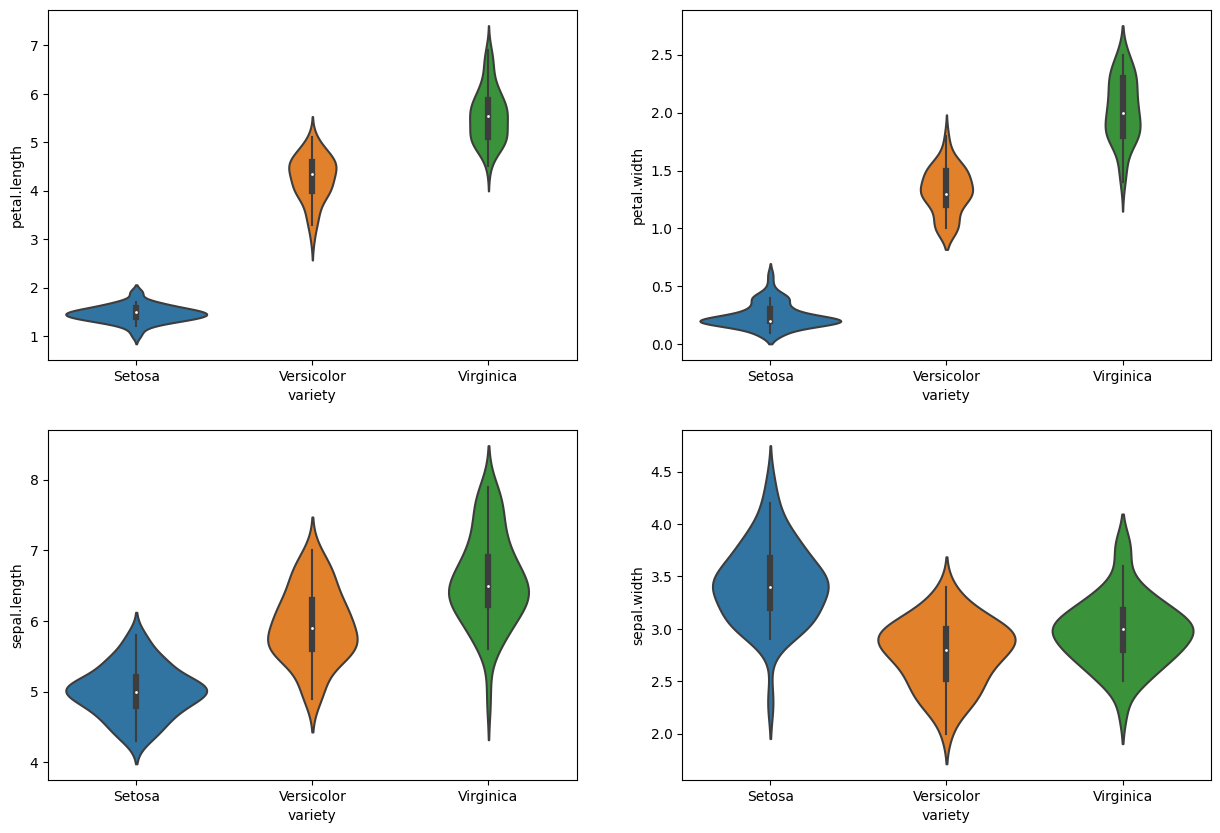

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(data=df, x='variety',y='petal.length')
plt.subplot(2,2,2)
sns.violinplot(data=df, x='variety',y='petal.width')
plt.subplot(2,2,3)
sns.violinplot(data=df, x='variety',y='sepal.length')
plt.subplot(2,2,4)
sns.violinplot(data=df, x='variety',y='sepal.width')

**Difference analysis between Plotly and species**

In [ ]:
dataSetosa = df[df.variety == 'Setosa'] 
dataVersicolor = df[df.variety == 'Versicolor']
dataVirginica = df[df.variety == 'Virginica']

trace1 = go.Box(
    y=dataSetosa["sepal.length"],
    name = 'Setosa',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace2 = go.Box(
    y=dataVersicolor["sepal.length"],
    name = 'Versicolor',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)

trace3 = go.Box(
    y=dataVirginica["sepal.length"],
    name = 'Virginica',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)

data1 = [trace1,trace2, trace3]
iplot(data1)

**Difference analysis between seabon and species**

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

48.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: xlabel='petal.width', ylabel='petal.length'>

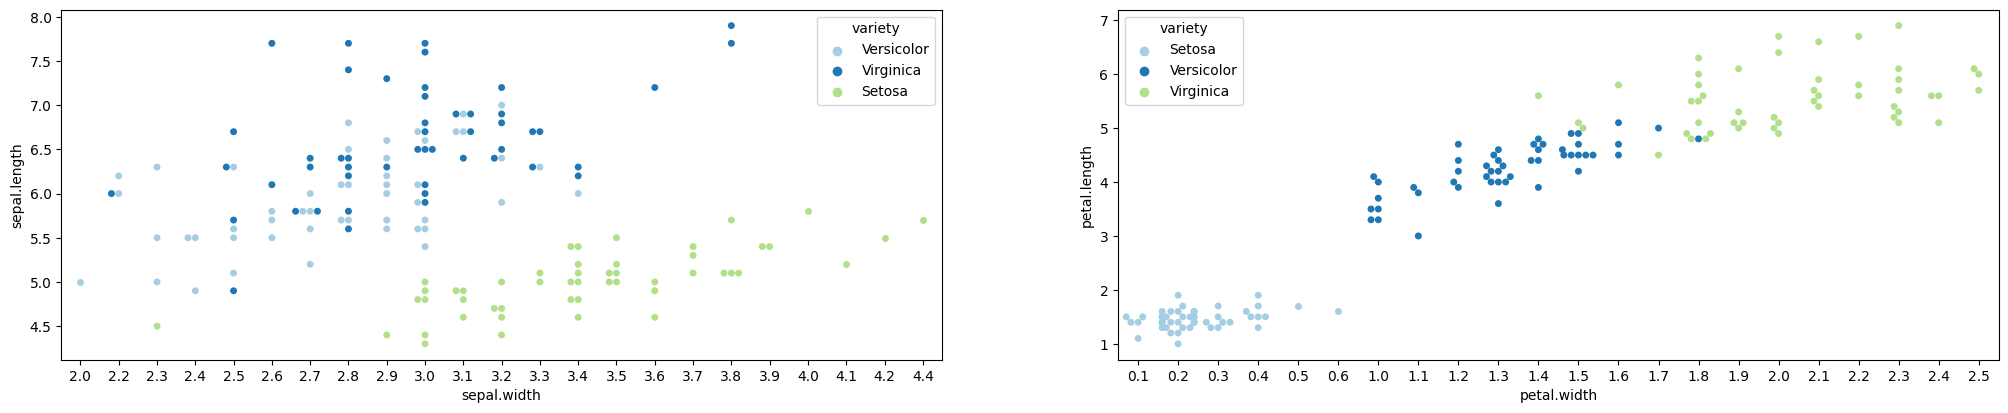

In [ ]:
plt.figure(figsize = (25,10))

plt.subplot(2,2,1)
sns.swarmplot(x="sepal.width", y="sepal.length", hue="variety",data = df, palette="Paired")
plt.subplot(2,2,2)
sns.swarmplot(x="petal.width", y="petal.length", hue="variety",data = df, palette="Paired")

**Data Editing**

In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
dataSetosa = df[df.variety == 'Setosa'] 
dataVersicolor = df[df.variety == 'Versicolor']
dataVirginica = df[df.variety == 'Virginica']


new_data = pd.concat([dataVersicolor,dataVirginica])
new_data = new_data.reset_index() 
new_data

,index,sepal.length,sepal.width,petal.length,petal.width,variety
0,50,7.0,3.2,4.7,1.4,Versicolor
1,51,6.4,3.2,4.5,1.5,Versicolor
2,52,6.9,3.1,4.9,1.5,Versicolor
3,53,5.5,2.3,4.0,1.3,Versicolor
4,54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...,...
95,145,6.7,3.0,5.2,2.3,Virginica
96,146,6.3,2.5,5.0,1.9,Virginica
97,147,6.5,3.0,5.2,2.0,Virginica
98,148,6.2,3.4,5.4,2.3,Virginica


In [ ]:
new_data.drop(["index"], axis=1,inplace = True)
new_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,7.0,3.2,4.7,1.4,Versicolor
1,6.4,3.2,4.5,1.5,Versicolor
2,6.9,3.1,4.9,1.5,Versicolor
3,5.5,2.3,4.0,1.3,Versicolor
4,6.5,2.8,4.6,1.5,Versicolor


In [ ]:
new_data.variety = [1 if each == "Versicolor" else 0 for each in new_data.variety]
new_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


In [ ]:
y = new_data.variety.values
x_data = new_data.drop(["variety"], axis=1) # variety değerlerimizin olmadığı bir veri seti

x_data.head()

,sepal.length,sepal.width,petal.length,petal.width
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5


**Logistic Regression**

In [ ]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'



**Train & Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 16)

# Transpoz process
x_train = x_train.T
x_test = x_test.T#
y_train = y_train.T
y_test = y_test.T


# shape values
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (4, 80)
x_test:  (4, 20)
y_train:  (80,)
y_test:  (20,)


In [ ]:
def initialize_weights_and_bias(dimension):
    
    w = np.full((dimension,1),0.01) # Create values with 0.01 values
    
    b = 0.0 
    
    # These numbers are usually selected when using w and b.
    
    return w,b

**Sigmoid function**

In [ ]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    
    return y_head

**Cost, gradient**

In [ ]:
print(x_train.shape[1])

80


**Forward and Backward Propagation**

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    
    # forward propagation  
    
    # ((w values (1,30) * (4, 80) process) ve add bias values) = z
    z = np.dot(w.T,x_train) + b       # z values / np.dot : satır ve sütün olarak çarp
    y_head = sigmoid(z)               # The y_head value of our z value in s function
    
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) # loss value
    cost = (np.sum(loss))/x_train.shape[1]                      # /x_train.shape[1]=80   to normalized
    
    
    # backward propagation
    
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]              # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                                # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias} # we used dictionary to store parameters
    
    return cost,gradients

**Update Parameter**

In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 50 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

**Predict**

In [ ]:
tahmini_deger = []
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
            tahmini_deger.append(0)
        else:  
            Y_prediction[0,i] = 1
            tahmini_deger.append(1)

    return Y_prediction

**Logistic Regression**

Cost after iteration 0: 0.695998
Cost after iteration 50: 0.359708
Cost after iteration 100: 0.268726
Cost after iteration 150: 0.224786
Cost after iteration 200: 0.197993
Cost after iteration 250: 0.179563
Cost after iteration 300: 0.165932
Cost after iteration 350: 0.155351
Cost after iteration 400: 0.146849
Cost after iteration 450: 0.139837
Cost after iteration 500: 0.133936
Cost after iteration 550: 0.128888
Cost after iteration 600: 0.124511
Cost after iteration 650: 0.120671
Cost after iteration 700: 0.117271
Cost after iteration 750: 0.114234
Cost after iteration 800: 0.111501
Cost after iteration 850: 0.109027
Cost after iteration 900: 0.106773
Cost after iteration 950: 0.104708
Cost after iteration 1000: 0.102809


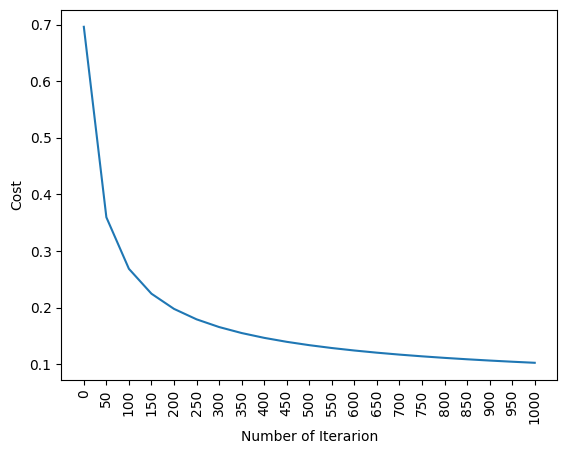

 
test accuracy: 95.0 %


In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print test Errors
    print(" ");
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 1001)    